In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

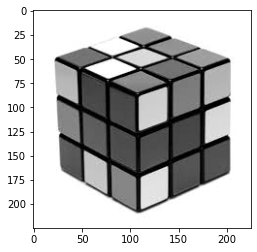

In [3]:
cube=cv2.imread('cube.png',0)
plt.imshow(cube,cmap='gray')

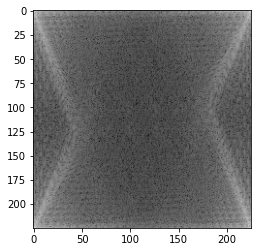

In [4]:
F=np.fft.fft2(cube)
plt.imshow(np.log1p(np.abs(F)),cmap='gray')

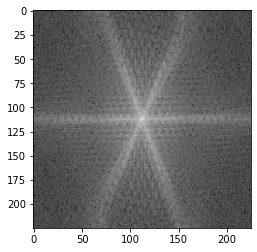

In [6]:
Fshift=np.fft.fftshift(F)
plt.imshow(np.log1p(np.abs(Fshift)),cmap='gray')

### Low Pass 

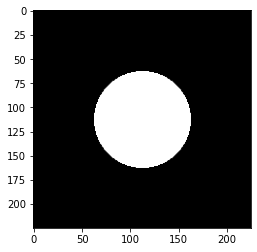

In [7]:
H=np.zeros(cube.shape)
D0=50
for i in range(cube.shape[0]):
    for j in range(cube.shape[1]):
        D=np.sqrt((i-cube.shape[0]/2)**2+(j-cube.shape[1]/2)**2)
        if D<=D0:
            H[i][j]=1  # for high pass filter H[i][j]=0 in if rest code will be same
        else:
            H[i][j]=0
plt.imshow(H,cmap='gray')

### Gaussian Low Pass

In [ ]:
H=np.zeros(cube.shape)
D0=50
for i in range(cube.shape[0]):
    for j in range(cube.shape[1]):
        D=np.sqrt((i-cube.shape[0]/2)**2+(j-cube.shape[1]/2)**2)
        if D<=D0:
            H[i][j]=np.exp(-D**2/2*D0*D0)  # for Gaussian high pass filter H[i][j]=1-np.exp(-D**2/2*D0*D0)  in if rest code will be same
        else:
            H[i][j]=0
plt.imshow(H,cmap='gray')

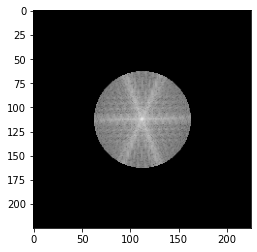

In [8]:
Gshift=Fshift*H
plt.imshow(np.log1p(np.abs(Gshift)),cmap='gray')

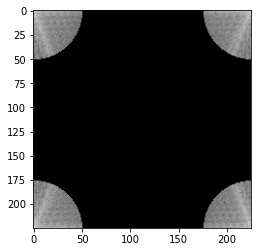

In [9]:
G=np.fft.ifftshift(Gshift)
plt.imshow(np.log1p(np.abs(G)),cmap='gray')

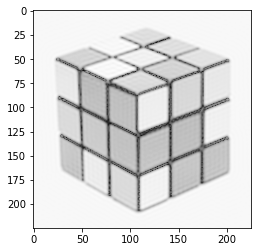

In [11]:
G_output=np.fft.ifft2(np.fft.ifftshift(Gshift))
plt.imshow(np.log1p(np.abs(G_output)),cmap='gray')